# 基礎的な回帰予測を行なう 10本 Knock

## Knock31: Data を読み込もう

In [2]:
# Boston data の読み込み
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
# Data を確認
print('説明変数')
print(f"{len(boston.data)}件")
print(boston.data[:5])

print('目的変数')
print(f"{len(boston.target)}件")
print(boston.target[:5])

print('変数名')
print(f"{len(boston.feature_names)}件")
print(boston.feature_names)

説明変数
506件
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
目的変数
506件
[24.  21.6 34.7 33.4 36.2]
変数名
13件
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# DataFrame に格納
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Knock32: Data の概要を把握しよう

In [5]:
# 代表値の確認
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- Data に欠損値が含まれている状態だと学習処理ができないため、除去や補完などで予め対処する必要あり。
- 代表値で Data の概要を掴んだ後は、Data のばらつきや外れ値を押さえておく。

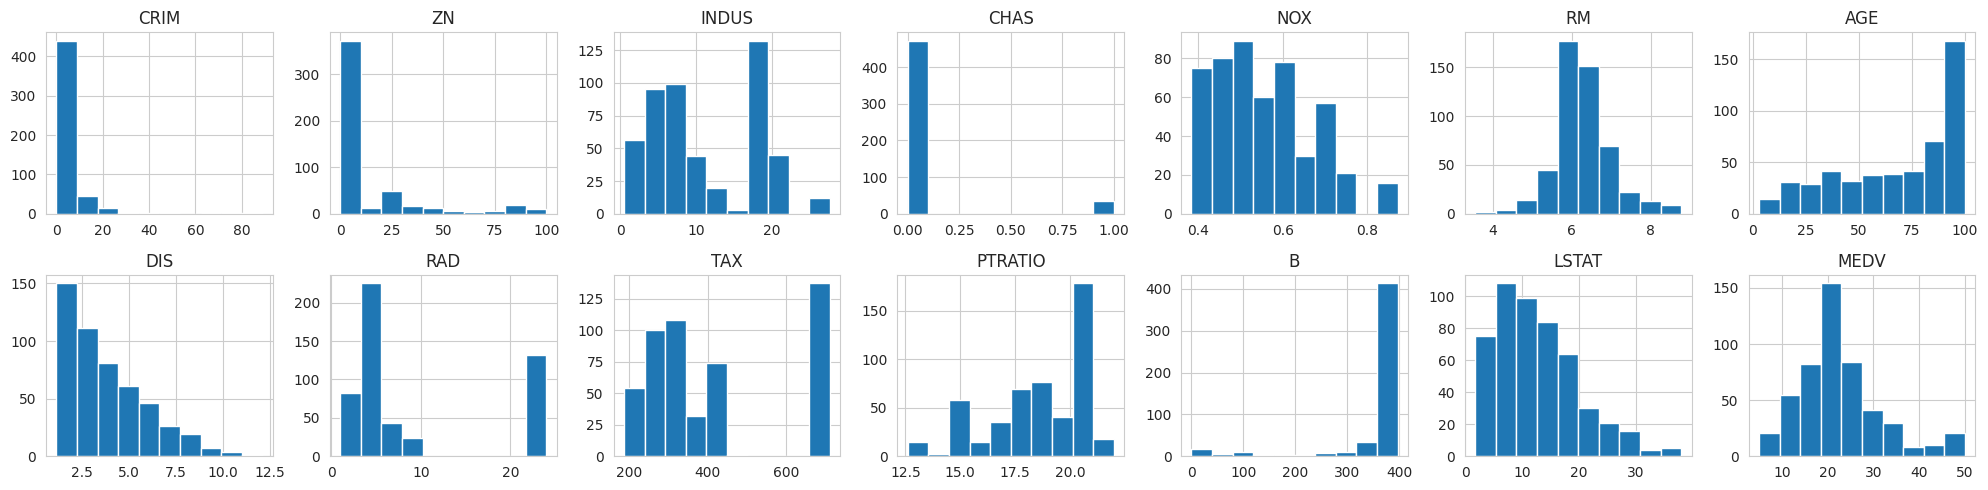

In [6]:
# Histogram によるばらつきの確認
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- Histogram を活用し Data を可視化することで Data の分布の特徴を把握しやすくなる。
- 線形回帰 Model の精度は外れ値の影響を大きく受けることがあるため、場合によってはそれらを取り除く判断が必要になる。

## Knock33: Data 同士の相関を把握しよう

### 相関
２つの変数間で「一方が変わればそれらについてもう一方も変わる」という関係性のこと。

### 相関係数
相関度合いを数値化したもの。

### 機械学習においての相関係数
説明変数を選択する上で重要な指標。
- 目的変数と相関が強い説明変数を使用 => Model精度の向上。
- 目的変数と相関が著しく低い説明変数を使用 => Model精度を悪化させる原因に繋がる。
- 変数同士で相関が強いものあある場合は、どちら一方のみの採用を推奨。
  > **多重共線性**: 説明変数同士での相関が強い状態のこと。この状態で機械学習 Model の構築を行なうと Model の解釈性や予測精度が低下する問題が生じる可能性がある。

In [7]:
# 相関係数の確認
df_corr = df.corr()
display(df_corr)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


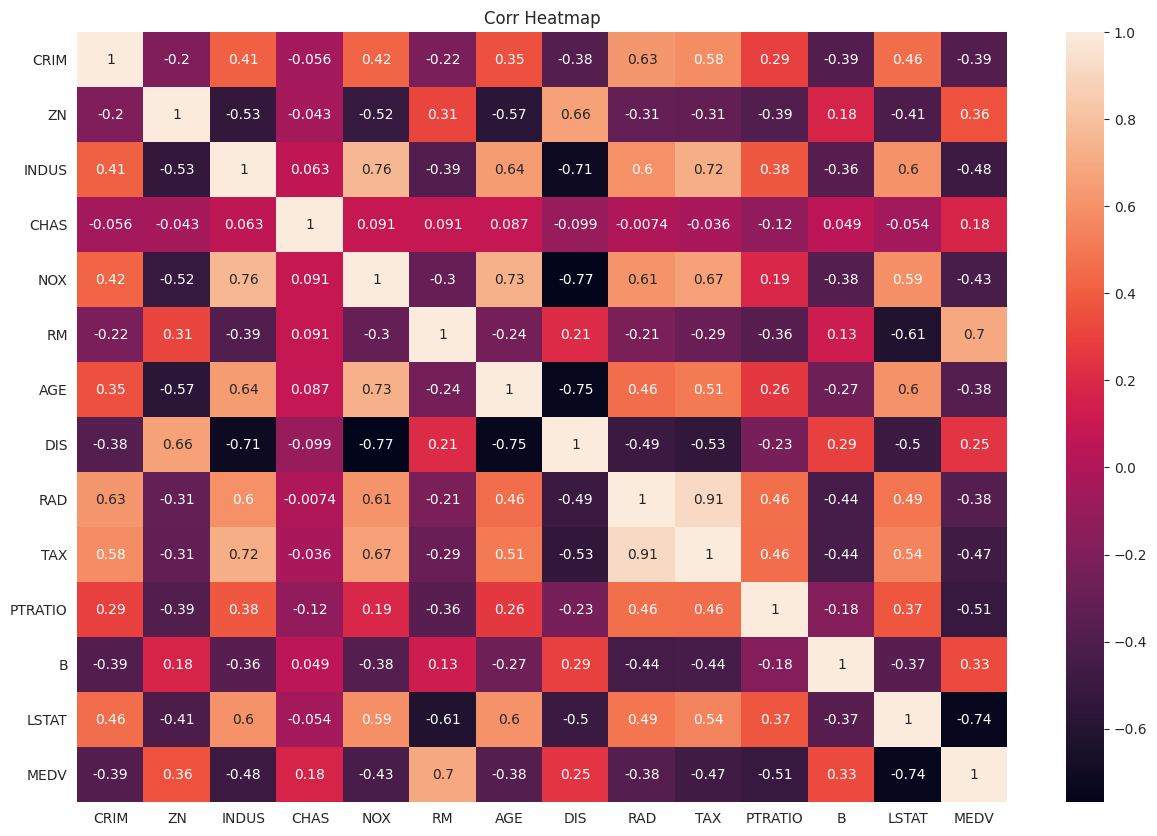

In [8]:
# 相関係数の Heatmap
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True)
plt.title('Corr Heatmap')
plt.show()

- 相関係数は -1 ~ 1 の範囲で値をとる。
- 相関係数が Plus  => 正の相関。
- 相関係数が Minus => 負の相関。
- 相関係数の絶対値が大きいほど、相関が強い。

### Knock34: Data を分割しよう
#### Model とは
入力された Data を何らかの基準に基づき計算し、結果を出力する仕組み。

- 機械学習では、訓練 Data より「何らかの基準」にあたる部分を定義する
    - 単回帰では、最小二乗法という方法で実測値との誤差が最小になる直性 y = ax+b {a: 傾き, b: 切片}を定義する。

「x（説明変数）」を入力すれば「y（目的変数）」を予測値として出力する。という機械学習 Model が完成する

In [9]:
from IPython.display import display

# 説明変数・目的変数の分割
X = df[['RM']]
y = df[['MEDV']]

display(X.head())
display(y.head())

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### 訓練 Data
実際に学習に使用する Data

#### Test Data
訓練 Data の学習によって構築された Model の精度評価を行なうための Data

#### Holdout 法
Data-set を一定の比率で訓練 Data と Test Data に二分割し Model の精度を評価する手法

#### 交差検証法
訓練 Data と Test Data を入れ替えて、複数回学習と検証を行ない精度の平均をとる手法
Holdout 法で生じる
- Data sample が少ないと使用できない
- 訓練 Data, Test data の内容に偏りが生じる恐れがある

という問題を解消している

In [10]:
# 訓練 Data, Test Data の分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# test_size= : 少数で指定すると割合、整数で指定すると個数で Data を分割する

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,RM
141,5.019
272,6.538
135,6.335
298,6.345
122,5.961


152


,RM
329,6.333
371,6.216
219,6.373
403,5.349
78,6.232


### Knock35: 単回帰 Model を構築しよう

In [11]:
# 単回帰 Model の構築
from sklearn.linear_model import LinearRegression

simple_reg = LinearRegression().fit(X_train, y_train)

機械学習 Library は充実していて Model の構築自体は容易。
**どのような Sean でどの Model が使えるか** の理解が重要。

### Knock36: Model を使って値を予測しよう
`predict()` で説明変数となる Data を渡すことで予測を行なえる。

In [12]:
# 予測結果の出力
y_train_pred = simple_reg.predict(X_train)
y_test_pred = simple_reg.predict(X_test)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[10.73920657]
 [24.8831139 ]
 [22.9929143 ]
 [23.08602758]
 [19.51047761]]
152
[[22.97429165]
 [21.88486626]
 [23.34674477]
 [13.81194483]
 [22.03384751]]


### Knock37: 予測結果を可視化してみよう

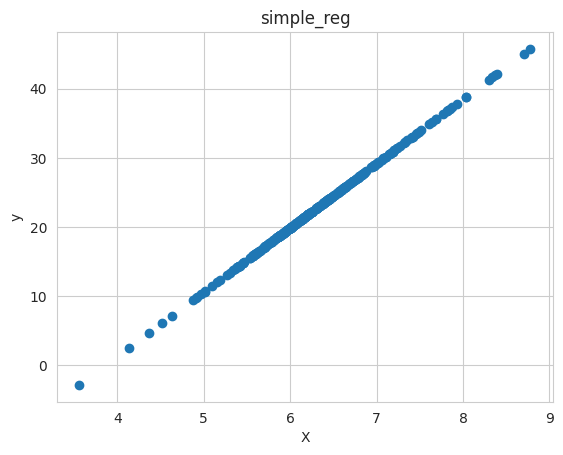

In [13]:
# 予測結果の可視化（訓練 Data）
plt.scatter(X_train, y_train_pred)
plt.xlabel('X')
plt.ylabel('y')
plt.title('simple_reg')
plt.show()

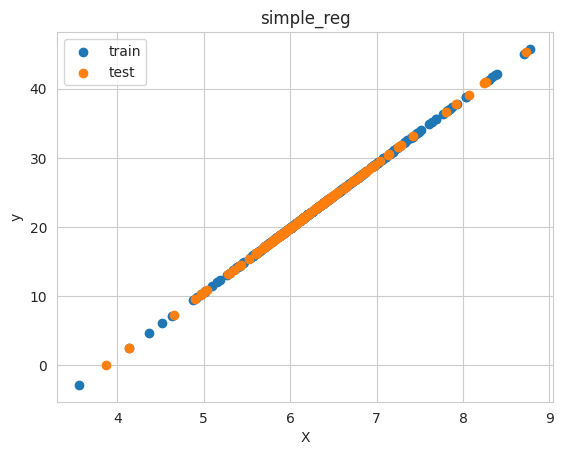

In [14]:
# 予測結果の可視化（訓練 Data - Test Data）
plt.scatter(X_train, y_train_pred, label='train')
plt.scatter(X_test, y_test_pred, label='test')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y')
plt.title('simple_reg')
plt.legend()
plt.show()

In [15]:
# 傾きと切片の出力
print(f"a = {simple_reg.coef_[0][0]}")
print(f"b = {simple_reg.intercept_[0]}")

a = 9.311328063251853
b = -35.99434897818352


重回帰などの複数の説明変数を使用する Algorithm では、各説明変数の重み（重要度）を把握するための大事な指標となる為、`.coef_` と `.intercept_` の出力方法はおさえておく。

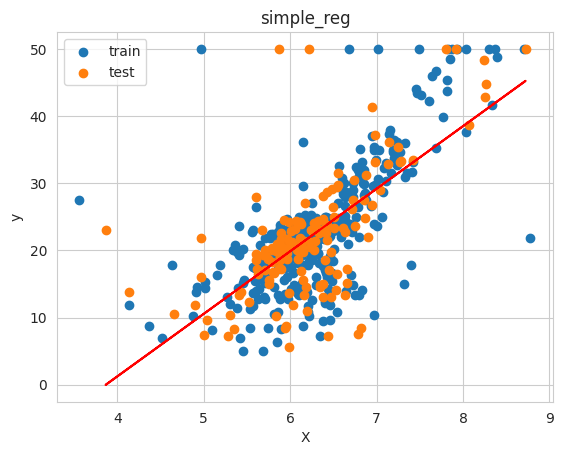

In [16]:
# 予実の Plot
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_test_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('simple_reg')
plt.legend()
plt.show()

#### 残差 Plot
回帰直線との距離（予測値と実測値の差）に焦点を当てて可視化する手法

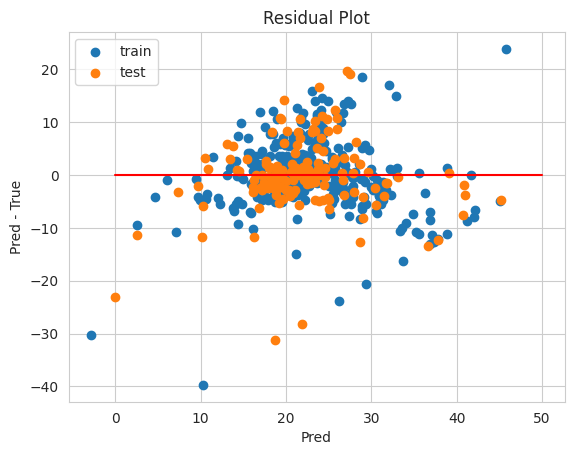

In [17]:
# 残差 Plot
plt.scatter(y_train_pred, y_train_pred - y_train, label='train')
plt.scatter(y_test_pred, y_test_pred - y_test, label='test')
plt.plot([0, 50], [0, 0], color='red')
plt.xlabel('Pred')
plt.ylabel('Pred - True')
plt.title('Residual Plot')
plt.legend()
plt.show()

残差 Plot では、予測値と実現値の差が 0 である理想的な状態（上記図では赤線）から実際の差がどれくらいばらついているのかを視覚的に把握することができる。